In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# provided helper functions

# forces
def forces(x,y,A):
    N = np.size(A,axis = 0)
    # find pairwise distances 
    xaux = np.outer(x,np.ones(np.shape(x)))
    yaux = np.outer(y,np.ones(np.shape(x)))
    dx = A*(xaux - np.transpose(xaux))
    dy = A*(yaux - np.transpose(yaux))
    dxy = np.sqrt(dx**2 + dy**2)
    # spring forces due to linked vertices
    # optimal distance between linked vertices is 1 
    Aind = np.argwhere(A == 1)
    idiff = np.zeros(np.shape(A))
    Nlinks = np.size(Aind,axis = 0)
    for j in range(Nlinks):
        idiff[Aind[j,0],Aind[j,1]] = 1 - 1/dxy[Aind[j,0],Aind[j,1]]
    
    fx = -np.sum(idiff*dx,axis = 1)
    afx = np.minimum(np.abs(fx),np.ones(np.size(fx)))
    sfx = np.sign(fx)
    fx = afx*sfx
                  
    fy = -np.sum(idiff*dy,axis = 1)
    afy = np.minimum(np.abs(fy),np.ones(np.size(fy)))
    sfy = np.sign(fy)
    fy = afy*sfy
    
    f_linked = np.concatenate((fx,fy),axis = 0)
    
    # repelling spring forces due to unlinked vertices
    # repelling is on if the distance between unlined verticas is greater than sqrt(3)
    h = np.sqrt(3.0)
    A1 = np.ones(np.shape(A)) - A
    dx = A1*(xaux - np.transpose(xaux))
    dy = A1*(yaux - np.transpose(yaux))
    dxy = np.sqrt(dx**2 + dy**2)
    mask = np.zeros(np.shape(A))
    diff = A1*(dxy - h)
    mask = np.minimum(diff,np.zeros(np.shape(diff)))
    fx = np.sum(mask*dx,axis=1)
    fy = np.sum(mask*dy,axis=1)
    f_unlinked = -np.concatenate((fx,fy),axis = 0)
    
    return np.reshape(f_linked + f_unlinked, (182,1))

# plot graph
def plot_graph(x,y,A):
    plt.figure(figsize=(12, 12))
    Aind = np.argwhere(A == 1)
    Nlinks = np.size(Aind,axis = 0)
    for j in range(Nlinks):
        plt.plot([x[Aind[j,0]],x[Aind[j,1]]],[y[Aind[j,0]],y[Aind[j,1]]],linewidth = 4,c = (0,0,0.5))
    plt.scatter(x,y,s=200,c='r')
    axes=plt.gca()
    axes.set_aspect(1)
    plt.axis('off')

In [3]:
# read CSV
AdjMatrix = pd.read_csv('Adjacency_matrix.csv', header=None)
AdjMatrix = AdjMatrix.to_numpy()

In [9]:
# initialize x and y
x = np.random.randn(91,1)*91
y = np.random.randn(91,1)*91
# initalize x and y averages for residuals
xAvgs = x
yAvgs = y 

Initially ||F|| = 13.425218894811763
i = 1 ||F|| = 13.425218894811763
i = 2 ||F|| = 13.424240186283514
i = 3 ||F|| = 13.422968131319783
i = 4 ||F|| = 13.421552317335559
i = 5 ||F|| = 13.420139487969216
i = 6 ||F|| = 13.418863848184298
i = 7 ||F|| = 13.417840334070402
i = 8 ||F|| = 13.417160497733672
i = 9 ||F|| = 13.416890616203487
i = 10 ||F|| = 13.409254189587424
i = 11 ||F|| = 13.401732728616212
i = 12 ||F|| = 13.39602189878137
i = 13 ||F|| = 13.392178773717704
i = 14 ||F|| = 13.39013601545214
i = 15 ||F|| = 13.389729859882987
i = 16 ||F|| = 13.39072931234045
i = 17 ||F|| = 13.392864116847168
i = 18 ||F|| = 13.395849688749236
i = 19 ||F|| = 13.399407833387686
i = 20 ||F|| = 13.403282658049257
i = 21 ||F|| = 13.395667327357158
i = 22 ||F|| = 13.371236422634773
i = 23 ||F|| = 13.354269725223501
i = 24 ||F|| = 13.348215372243287
i = 25 ||F|| = 13.350776211976882
i = 26 ||F|| = 13.355770881795632
i = 27 ||F|| = 13.341330319056246
i = 28 ||F|| = 13.328227527091427
i = 29 ||F|| = 13.32241

C:\Users\James\AppData\Local\Temp\ipykernel_3040\1816290746.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  residuals[j] = r


i = 2484 ||F|| = 3.509355909185005
i = 2485 ||F|| = 3.5048586988856485
i = 2486 ||F|| = 3.5002937187532166
i = 2487 ||F|| = 3.4956983341026415
i = 2488 ||F|| = 3.4911380806255843
i = 2489 ||F|| = 3.4866838734293406
i = 2490 ||F|| = 3.4823741171980243
i = 2491 ||F|| = 3.4782503804213074
i = 2492 ||F|| = 3.474377136648355
i = 2493 ||F|| = 3.470750787306992
i = 2494 ||F|| = 3.467351008806422
i = 2495 ||F|| = 3.464148033211316
i = 2496 ||F|| = 3.461109358725083
i = 2497 ||F|| = 3.4582048714590585
i = 2498 ||F|| = 3.45540994535534
i = 2499 ||F|| = 3.4527065875884992
i = 2500 ||F|| = 3.450083044180531
i = 2501 ||F|| = 3.4465209637467953
i = 2502 ||F|| = 3.442711958618052
i = 2503 ||F|| = 3.4395887832402923
i = 2504 ||F|| = 3.4369509627225434
i = 2505 ||F|| = 3.434001967217133
i = 2506 ||F|| = 3.4288184983559526
i = 2507 ||F|| = 3.42506634511116
i = 2508 ||F|| = 3.422351522822419
i = 2509 ||F|| = 3.420309243623493
i = 2510 ||F|| = 3.418662351469421
i = 2511 ||F|| = 3.417240086610523
i = 2512 

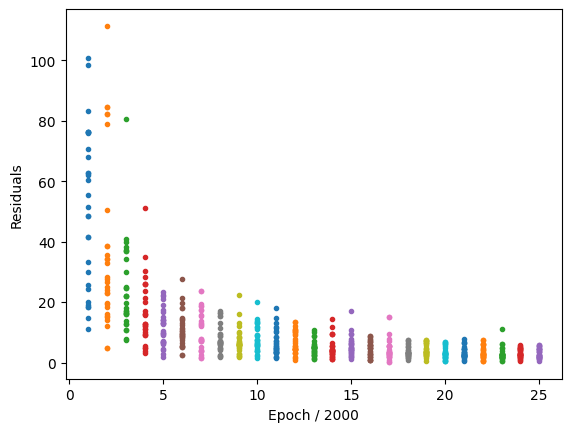

In [10]:
# Nesterov Optimizer
no_epochs = 50000
resid_interval = int(no_epochs / 25)
alpha = 1e-2
m = 0.9
last_change = np.zeros((182,1))

res_Fig = plt.figure()
xAxisStr = "Epoch / " + str(resid_interval)
plt.xlabel(xAxisStr)
plt.ylabel('Residuals')

g = -forces(x,y,AdjMatrix)
Fs = np.zeros((no_epochs+1,1))
Fs[0] = np.linalg.norm(g)
print("Initially ||F|| = " + str(np.linalg.norm(g)))
for i in range(1,no_epochs+1):
    projX = x + last_change[0:91]*m
    projY = y + last_change[91:182]*m
    g = -forces(projX, projY,AdjMatrix)
    last_change = (m*last_change) - alpha*g
    x = x + last_change[0:91]
    y = y + last_change[91:182]
    Fs[i] = np.linalg.norm(g)
    xAvgs = (i * xAvgs + x)/(i + 1)
    yAvgs = (i * yAvgs + y)/(i + 1)
    print("i = " + str(i) + " ||F|| = " + str(np.linalg.norm(g)))
    # plot the residuals
    if i % resid_interval == 0:
        graphX = np.ones((30,1))*int(i / resid_interval)
        resid_index = np.random.choice(range(0,91), (30,))
        x_res = x[resid_index] - xAvgs[resid_index]
        y_res = y[resid_index] - yAvgs[resid_index]
        residuals = np.zeros((30,))
        for j in range(30):
            r = np.sqrt(x_res[j]**2 + y_res[j]**2)
            residuals[j] = r 
        plt.plot(graphX, residuals, '.')
        res_Fig.canvas.draw()


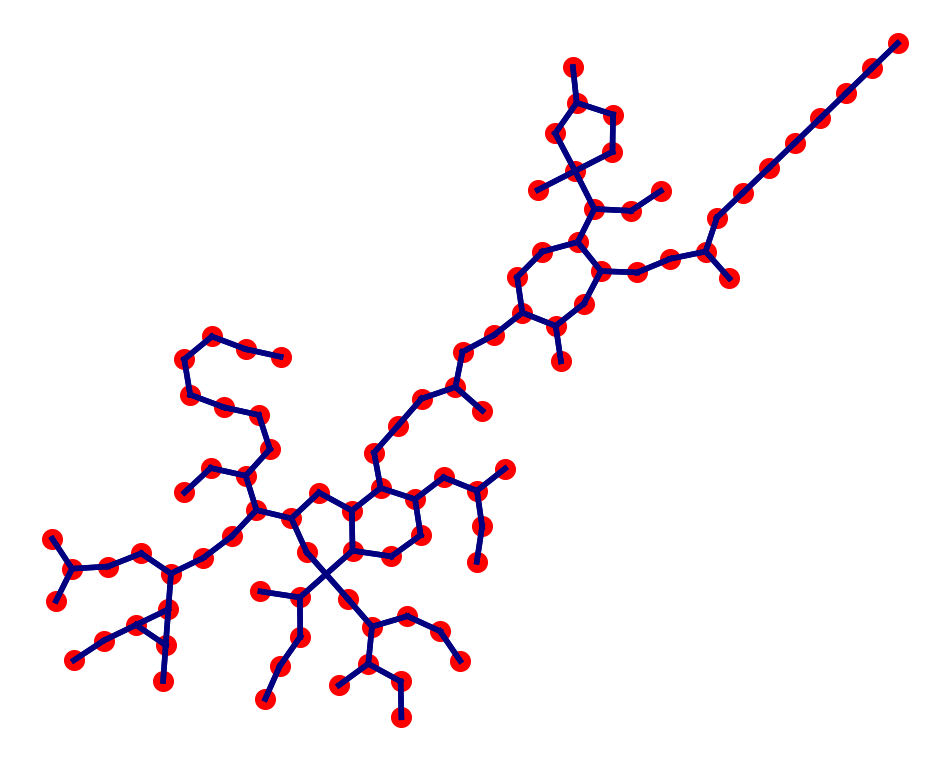

In [12]:
plot_graph(x,y,AdjMatrix)

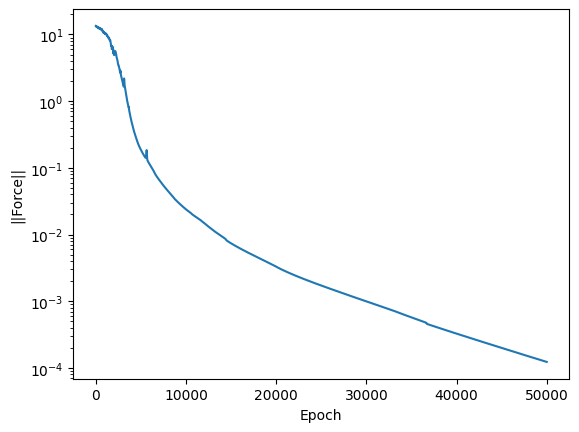

In [13]:
plt.plot(range(0,no_epochs+1), Fs)
plt.xlabel("Epoch")
plt.ylabel("||Force||")
plt.yscale("log")